# Clustering Analysis

## Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN)

An extension to Density-Based Spatial Clustering of Applications with Noise (DBSCAN). Python based package published in 2013.

- clustering based on varying density
- highly scalable -> easily add new dimension/parameter to data
- Only single parameter need to be tuned to obtain the clustering, minimum number of cluster size

This can be a much more efficient "cut-based" method usually done in selecting events in physics experiments. Result in a more cleaner cut than previous methods.

As this is an "unsupervised training" method, we can potentially used this method to obtain new class of events that are unique to others by going each of the classes found.

In [1]:
%%time

from root_pandas import read_root
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10.0, 8.0)

file_piled = "Piled_2.root"
file_flat = "Flat.root"
file_alpha = "Alpha_11.root"
file_ls = "LS.root"
file_ls_beta = "LS_BETA.root"
file_ref = "RefPulse.root"

file_pre_analysis = "Run009-230-001.root"

files = ["TEST.root"]

def reshape_PSD(x,n,l):
    return x.PSDPara.values.reshape(n,l)

def reshape_Energy(x,n,l):
    return x.Energy.values.reshape(n,l)

def reshape_PSDDoubleP(x,n,l):
    return x.PSDDoubleP.values.reshape(n,l)

def reshape_RatioR(x,n,l):
    return x.RatioR.values.reshape(n,l)

def reshape_DataQuality(x,n,l):
    return x.DataQuality.values.reshape(n,l)
    
PSDPara1 = np.array([])
PSDPara4 = np.array([])
PSDPara7 = np.array([])
PSDPara10 = np.array([])
PSDPara13 = np.array([])
PSDPara18 = np.array([])
Energy = np.array([])
PSDDoubleP = np.array([])
RatioR = np.array([])
Ratio4us = np.array([])
Ratio = np.array([])
DataQuality0 = np.array([])
DataQuality1 = np.array([])
DataQuality2 = np.array([])
DataQuality3 = np.array([])


Label = []

tree = "tree"
for p in files:
    print(p)
    x = read_root(p, tree, columns=["PSDPara"], flatten=["PSDPara"])
    x1 = read_root(p, tree, columns=["Energy"], flatten=["Energy"])
    x2 = read_root(p, tree, columns=["PSDDoubleP"], flatten=["PSDDoubleP"])
    x3 = read_root(p, tree, columns=["RatioR"], flatten=["RatioR"])
    x4 = read_root(p, tree, columns=["Ratio4us"])
    x5 = read_root(p, tree, columns=["Ratio"])
    x6 = read_root(p, tree, columns=["DataQuality"], flatten=["DataQuality"])
    l,h = x.shape
    li=int(l/34)
    y = reshape_PSD(x, li, 34)
    y1 = reshape_Energy(x1, li, 3)
    y2 = reshape_PSDDoubleP(x2, li, 22)
    y3 = reshape_RatioR(x3, li, 3)
    y4 = reshape_DataQuality(x6,li, 4)
    PSDPara1 = np.concatenate((PSDPara1, y[:,1]), axis=0)
    PSDPara4 = np.concatenate((PSDPara4, y[:,4]), axis=0)
    PSDPara7 = np.concatenate((PSDPara7, y[:,7]), axis=0)
    PSDPara10 = np.concatenate((PSDPara10, y[:,10]), axis=0)
    PSDPara13 = np.concatenate((PSDPara13, y[:,13]), axis=0)
    PSDPara18 = np.concatenate((PSDPara18, y[:,18]), axis=0)
    Energy = np.concatenate((Energy, y1[:,1]), axis=0)
    PSDDoubleP = np.concatenate((PSDDoubleP, y2[:,16]), axis=0)
    RatioR = np.concatenate((RatioR, y3[:,1]), axis=0)
    Ratio4us = np.concatenate((Ratio4us, np.squeeze(x4)),axis=0)
    Ratio = np.concatenate((Ratio, np.squeeze(x5)), axis=0)
    DataQuality0 = np.concatenate((DataQuality0, y4[:,0]), axis=0)
    DataQuality1 = np.concatenate((DataQuality1, y4[:,1]), axis=0)
    DataQuality2 = np.concatenate((DataQuality2, y4[:,2]), axis=0)
    DataQuality3 = np.concatenate((DataQuality3, y4[:,3]), axis=0)
    Label.append(li)
    
data_Label = np.array([])
dummy = np.arange(1)

for i in range(1):
    z = np.full((Label[i], ), dummy[i])
    data_Label = np.concatenate((data_Label, z),axis=0)

PSDPara1 = np.expand_dims(PSDPara1, axis=1)
PSDPara4 = np.expand_dims(PSDPara4, axis=1)
PSDPara7 = np.expand_dims(PSDPara7, axis=1)
PSDPara10 = np.expand_dims(PSDPara10, axis=1)
PSDPara13 = np.expand_dims(PSDPara13, axis=1)
PSDPara18 = np.expand_dims(PSDPara18, axis=1)
Energy = np.expand_dims(Energy, axis=1)
PSDDoubleP = np.expand_dims(PSDDoubleP, axis=1)
RatioR = np.expand_dims(RatioR, axis=1)
Ratio4us = np.expand_dims(Ratio4us, axis=1)
Ratio = np.expand_dims(Ratio, axis=1)
DataQuality0 = np.expand_dims(DataQuality0, axis=1)
DataQuality1 = np.expand_dims(DataQuality1, axis=1)
DataQuality2 = np.expand_dims(DataQuality2, axis=1)
DataQuality3 = np.expand_dims(DataQuality3, axis=1)

DataQuality = np.concatenate((DataQuality0,DataQuality1,DataQuality2,DataQuality3),axis=1)
data = np.concatenate((PSDPara1, PSDPara7, PSDPara13, Energy, PSDDoubleP, RatioR, Ratio4us, Ratio), axis=1)
print(data.shape)

Welcome to JupyROOT 6.10/02
TEST.root
(142115, 8)
CPU times: user 6.14 s, sys: 534 ms, total: 6.67 s
Wall time: 6.75 s


# Delete ugly data 

In [2]:
%%time
print(data.shape)
DATA = np.array([])
l=0
for i in range(len(data)):
    if (DataQuality[i,0]==0 and DataQuality[i,1]==0 and DataQuality[i,2]==0 and DataQuality[i,3]==0):
        DATA = np.concatenate((DATA, data[i]),axis=0)
        l+=1
DATA=DATA.reshape(l,8)
print(DATA.shape)

(142115, 8)
(65729, 8)
CPU times: user 15.4 s, sys: 5.57 s, total: 21 s
Wall time: 20.9 s


# Approx. 800k events ~ PerSubRun ~ one day

add DataQuality?
add trigger condition?

 0 - PSDPara[1]
 1 - PSDPara[4]
 2 - PSDPara[7]
 3 - PSDPara[10]
 4 - PSDPara[13]
 5 - PSDPara[18]
 6 - Energy
 7 - PSDDoubleP[16]
 8 - RatioR
 9 - Ratio4us
 10 - Ratio
 11 - DataQuality0
 12 - DataQuality1
 13 - DataQuality2
 14 - DataQuality3


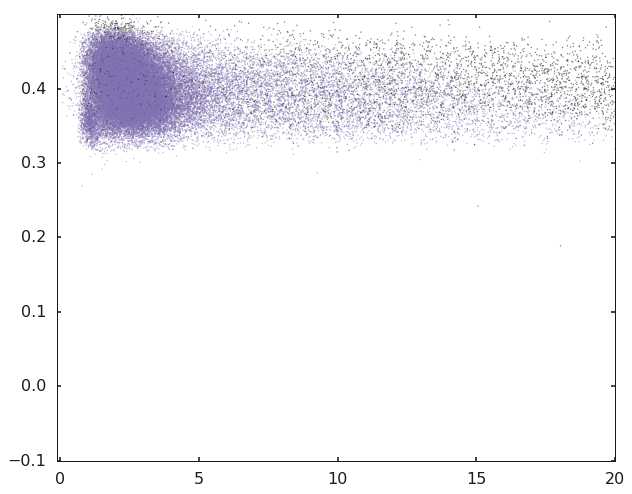

CPU times: user 7.08 s, sys: 821 ms, total: 7.9 s
Wall time: 8.98 s


In [3]:
%%time
# from sklearn import neighbors

# n_neighbors = 15

# clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform').fit(data,data_Label)

# h = .2

# x_min, x_max = data.min() - 1, data.max() + 1
# y_min, y_max = data.min() - 1, data.max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))
# Z = clf.predict(data)
# print(z)
# Z = Z.reshape(xx.shape)
# plt.figure()
# plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# plt.scatter(data[:1000, 0], data[:1000, 2], c=y, cmap=cmap_bold,
#             edgecolor='k', s=20)
# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.show()
import time
import seaborn as sns
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.8, 's' : 5, 'linewidths':0}
import hdbscan

print(" 0 - PSDPara[1]\n 1 - PSDPara[4]\n 2 - PSDPara[7]\n 3 - PSDPara[10]\n 4 - PSDPara[13]\n 5 - PSDPara[18]\n 6 - Energy\n 7 - PSDDoubleP[16]\n 8 - RatioR\n 9 - Ratio4us\n 10 - Ratio\n 11 - DataQuality0\n 12 - DataQuality1\n 13 - DataQuality2\n 14 - DataQuality3")

clusters_labels = hdbscan.HDBSCAN(min_cluster_size=25).fit_predict(DATA)

plt.figure()
palette = sns.color_palette("deep", np.unique(clusters_labels).max()+1)
colors = [palette[x] if x>=0 else (0,0,0) for x in clusters_labels]
plt.scatter(DATA[:,0], DATA[:,5], c=colors, s=2, lw=0, alpha=0.5)
plt.xlim(-0.1,20)
plt.ylim(-0.1,0.5)
plt.show()

# print(clusters_labels[:1000])
# def plot_clusters(data, algorithm, args, kwds):
#     start_time = time.time()
#     labels = algorithm(*args, **kwds).fit_predict(data)
#     end_time = time.time()
#     palette = sns.color_palette('deep', np.unique(labels).max() + 1)
#     colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
#     plt.scatter(data[:,0], data[:,9], c=colors, **plot_kwds)
#     frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
# #     plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
# #     plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
#     plt.ylim(-0.5,0.5)
#     plt.xlim(-0.1,15)
#     plt.show()
    
# plot_clusters(data, hdbscan.HDBSCAN, (), {'min_cluster_size':70})

 0 - PSDPara[1]
 1 - PSDPara[4]
 2 - PSDPara[7]
 3 - PSDPara[10]
 4 - PSDPara[13]
 5 - PSDPara[18]
 6 - Energy
 7 - PSDDoubleP[16]
 8 - RatioR
 9 - Ratio4us
 10 - Ratio
 11 - DataQuality0
 12 - DataQuality1
 13 - DataQuality2
 14 - DataQuality3


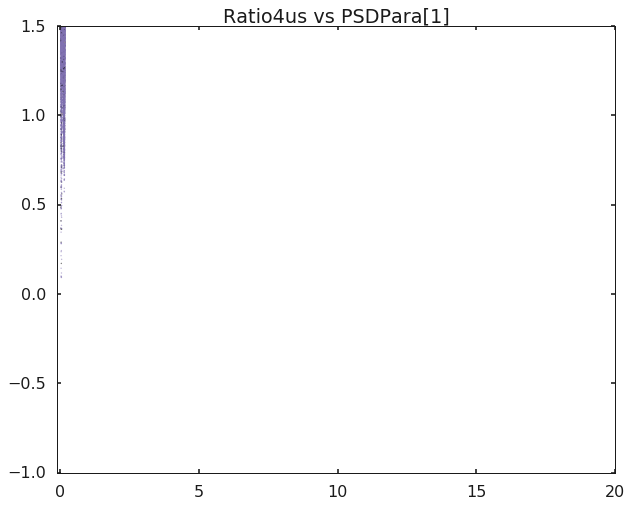

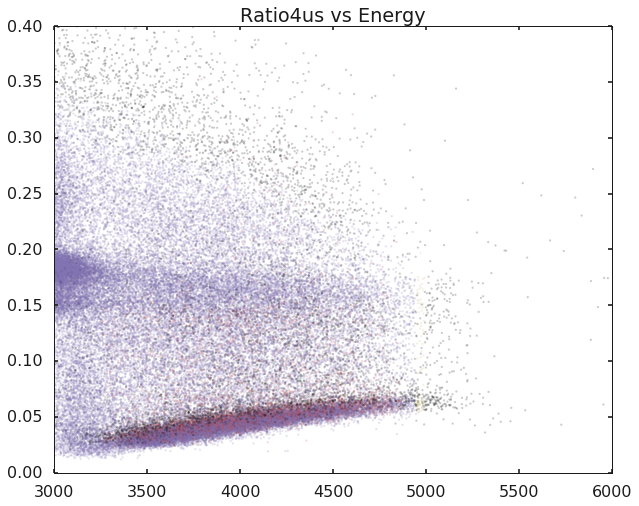

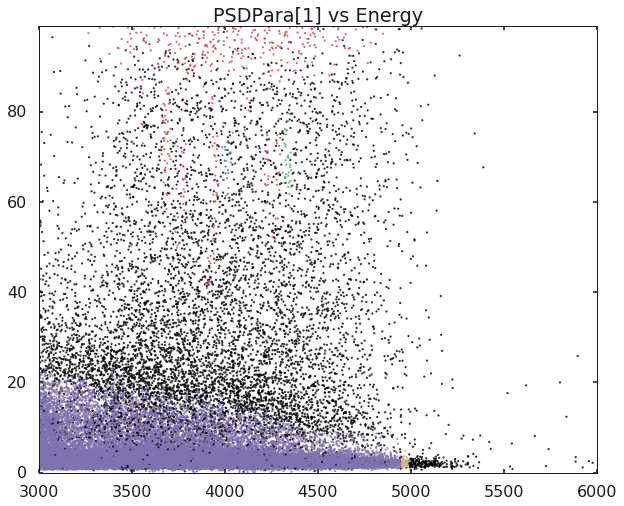

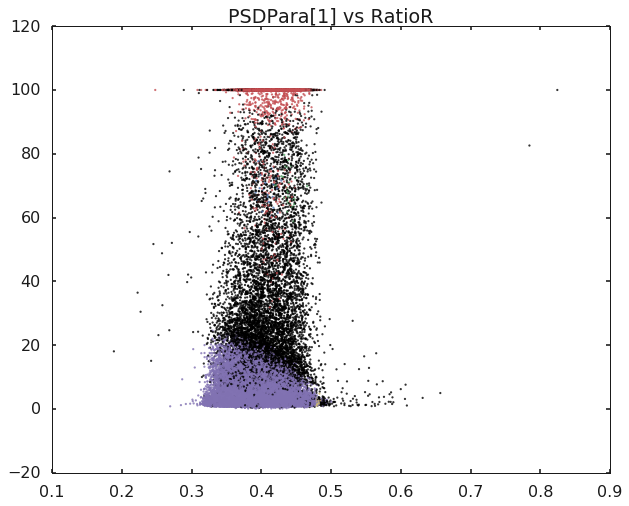

CPU times: user 14 s, sys: 2.28 s, total: 16.3 s
Wall time: 14.7 s


In [4]:
%%time
print(" 0 - PSDPara[1]\n 1 - PSDPara[4]\n 2 - PSDPara[7]\n 3 - PSDPara[10]\n 4 - PSDPara[13]\n 5 - PSDPara[18]\n 6 - Energy\n 7 - PSDDoubleP[16]\n 8 - RatioR\n 9 - Ratio4us\n 10 - Ratio\n 11 - DataQuality0\n 12 - DataQuality1\n 13 - DataQuality2\n 14 - DataQuality3")

plt.figure()
plt.title("Ratio4us vs PSDPara[1]")
plt.scatter(DATA[:,6], DATA[:,0], c=colors, s=2, lw=0, alpha=0.5)
plt.ylim(-1,1.5)
plt.xlim(-0.1,20)
plt.show()

plt.figure()
plt.title("Ratio4us vs Energy")
plt.scatter(DATA[:,3], DATA[:,6], c=colors, s=5, lw=0, alpha=0.2)
plt.ylim(0,0.4)
plt.xlim(3000,6000)
plt.show()

plt.figure()
plt.title("PSDPara[1] vs Energy")
plt.scatter(DATA[:,3], DATA[:,0], c=colors, s=5, lw=0, alpha=0.8)
plt.ylim(0,99)
plt.xlim(3000,6000)
plt.show()

plt.figure()
plt.title("PSDPara[1] vs RatioR")
plt.scatter(DATA[:,5], DATA[:,0], c=colors, s=5, lw=0, alpha=0.8)
# plt.ylim(0,99)
# plt.xlim(0,6000)
plt.show()

# Histogram

plot te labelled data.

4
65729
()
[ 3576.60961914] (1,)


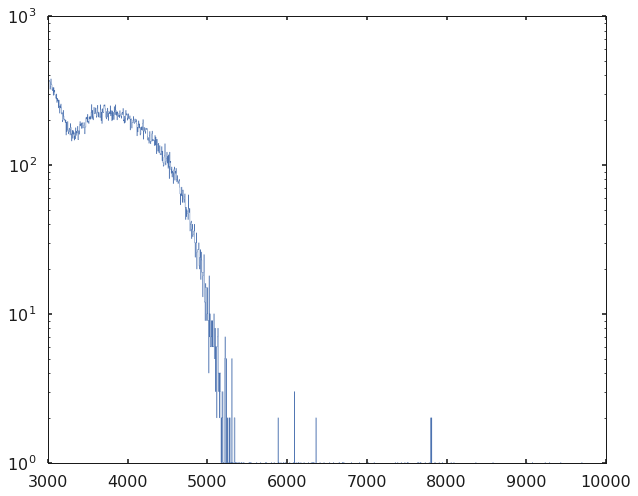

-1
(6606,)
[ 3576.60961914  4178.39892578  3953.22753906 ...,  3121.81616211
  3614.50756836  3499.63427734]


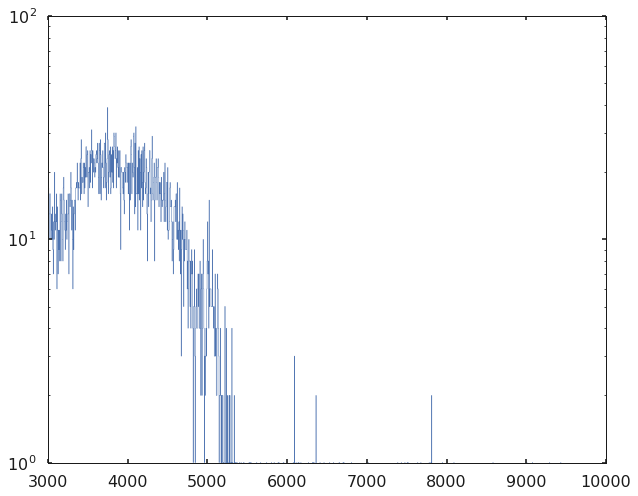

0
(19,)
[ 4011.55322266  4026.90771484  3992.48144531  4016.97363281  3986.49438477
  4018.30102539  3987.6003418   4042.50341797  3992.08032227  4031.92358398
  4014.26147461  4004.30297852  4020.13061523  3993.68212891  4017.16455078
  4019.35083008  4001.03759766  4005.37402344  4016.92285156]


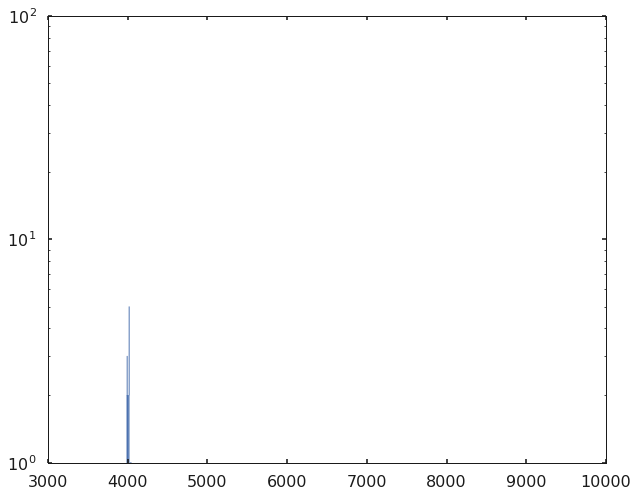

1
(25,)
[ 4353.19335938  4312.21435547  4341.53564453  4330.36083984  4340.99560547
  4324.26171875  4333.50976562  4327.98144531  4321.91650391  4344.20507812
  4352.52880859  4340.42480469  4329.234375    4326.75488281  4337.79736328
  4350.99853516  4348.40283203  4342.23291016  4344.54833984  4326.296875
  4355.74169922  4350.15429688  4354.29150391  4325.41748047  4337.65771484]


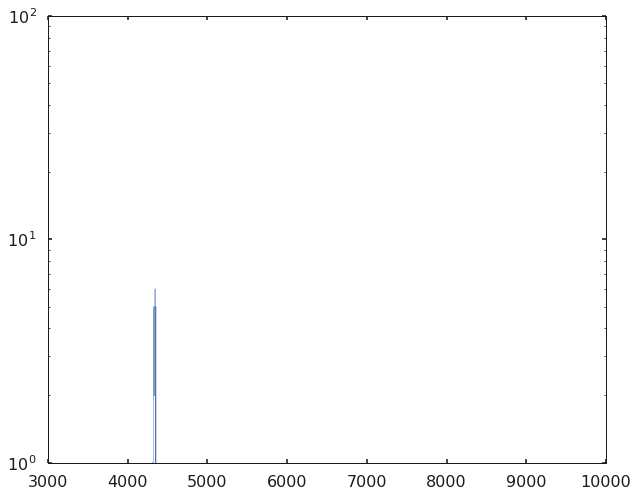

2
(4874,)
[ 4565.34912109  3566.12573242  3806.90551758 ...,  4170.984375
  4167.94921875  3703.74609375]


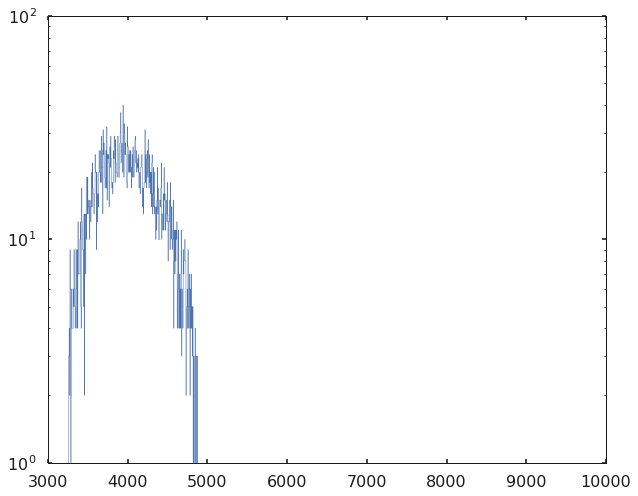

3
(38202,)
[ 4069.63818359  3006.82836914  4173.58837891 ...,  3141.57177734
  4321.48730469  3752.40673828]


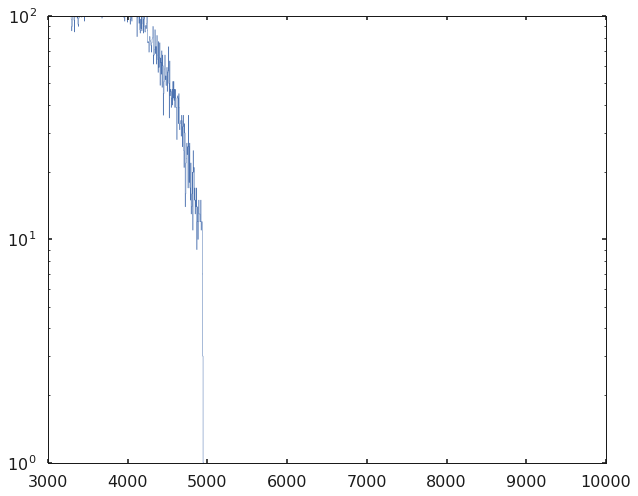

4
(69,)
[ 4980.24755859  4985.359375    4985.82421875  4969.84228516  4968.09521484
  4951.31347656  4988.58837891  4957.59326172  4981.24951172  4971.44091797
  4954.24414062  4952.89160156  4977.55078125  4981.0546875   4975.52880859
  4968.80126953  4988.93115234  4973.60595703  4956.01464844  4990.58154297
  4984.03564453  4956.31347656  4947.75341797  4952.39550781  4967.91357422
  4975.00976562  4953.50390625  4962.15039062  4953.04541016  4977.47851562
  4986.15429688  4954.28173828  4961.59423828  4971.02148438  4965.05761719
  4958.16015625  4950.83837891  4960.91894531  4964.68017578  4985.66113281
  4962.89941406  4993.24951172  4991.91992188  4966.45947266  4965.62158203
  4973.82324219  4978.95166016  4981.203125    4957.68164062  4966.48486328
  4959.03369141  4958.98046875  4966.75097656  4956.70654297  4954.12695312
  4951.85742188  4960.63671875  4982.02978516  4985.66455078  4953.68164062
  4957.70361328  4953.58154297  4976.48339844  4970.92626953  4958.34130859
  49

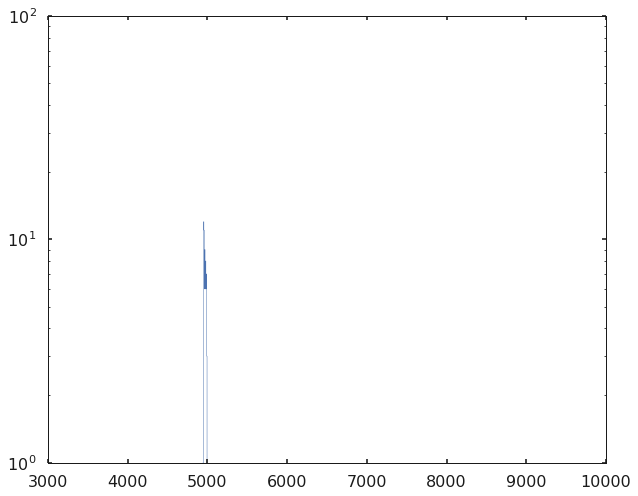

CPU times: user 10.1 s, sys: 631 ms, total: 10.7 s
Wall time: 10.8 s


In [10]:
%%time
print(max(clusters_labels))
print(len(clusters_labels))
bins = np.arange(3000,10000,5)

# print(DATA.shape)
# print(np.array(DATA[1][3]))

# E = DATA[:,3]
# ALL=np.zeros(len(clusters_labels))
ALL = np.array([])
print(DATA[1,3].shape)
test=(np.expand_dims(DATA[1,3],axis=0))
print(test,test.shape)

for i in range(len(clusters_labels)):
    E = np.expand_dims(DATA[i][3],axis=0)
#     print(E[i])
#     print(ALL)
#     ALL[i] = DATA[i,3]
    ALL = np.append(ALL,E,axis=0)
#     print(ALL)

plt.figure()
plt.hist(ALL, stacked=False, bins=bins, histtype="step")
plt.yscale("log")
plt.ylim(0,1e3)
plt.show()
    
for i in np.unique(clusters_labels):
    print(i)
    counts  =np.array([])
    for j in range(len(clusters_labels)):
        E = np.expand_dims(DATA[j][3],axis=0)
        if clusters_labels[j]==i:
            if Energy[j]>10000:
                continue
            else:
                counts = np.append(counts,E,axis=0)
    print(counts.shape)
    print(counts)
    if counts.shape!=0:
        plt.figure()
        plt.hist(counts, stacked=False, bins=bins, histtype="step")
        plt.yscale("log")
        plt.ylim(0,1e2)
        plt.show()
    